In [1]:
import os
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from models import ImageClassifier, FCNet
from datasets import get_metadata, get_imagenet_stats
import json

ModuleNotFoundError: No module named 'torch'

In [27]:
# base_raw = 'spmll_raw/'
base_logic = r'results\multi_label_experiment_2025_09_01_11-08-51_pascal_fine_tuned_from_linear/'

In [28]:
# Load params from a previous run
# with open(base_raw + 'params.json', 'r') as f:
#     RAW_P = json.load(f)
    
# Load params from a previous run
with open(base_logic + 'params.json', 'r') as f:
    LOGIC_P = json.load(f)

In [4]:
mean, std = get_imagenet_stats()
transform = transforms.Compose([
    transforms.Resize((448, 448)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Load category labels
category_map = {
    0: 'aeroplane', 1: 'bicycle', 2: 'bird', 3: 'boat', 4: 'bottle',
    5: 'bus', 6: 'car', 7: 'cat', 8: 'chair', 9: 'cow',
    10: 'diningtable', 11: 'dog', 12: 'horse', 13: 'motorbike', 14: 'person',
    15: 'pottedplant', 16: 'sheep', 17: 'sofa', 18: 'train', 19: 'tvmonitor', 20: "vehicle", 21: "animal", 22: "indoor"
}

In [ ]:
# # Match saved model exactly
# r_linear_classifier = FCNet(RAW_P['feat_dim'], RAW_P['num_classes'])
# r_model = ImageClassifier(RAW_P, model_linear_classifier=r_linear_classifier)
# r_model.load_state_dict(torch.load(base_raw + 'best_model_state_f.pt', map_location='cpu'))
# r_model.eval()

In [29]:
# Match saved model exactly
l_linear_classifier = FCNet(LOGIC_P['feat_dim'], LOGIC_P['num_classes'])
l_model = ImageClassifier(LOGIC_P, model_linear_classifier=l_linear_classifier)
l_model.load_state_dict(torch.load(base_logic + 'best_model_state_f.pt', map_location='cpu'))
l_model.eval()

initializing image classifier
feature extractor: imagenet pretrained


c:\Users\ibrah\Workspace\T\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ibrah\Workspace\T\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


feature extractor trainable
linear classifier layer: specified by user


C:\Users\ibrah\AppData\Local\Temp\ipykernel_19180\2603952748.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  l_model.load_state_dict(torch.load(base_logic + 'best_model_

ImageClassifier(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [8]:
import requests
from PIL import Image
from io import BytesIO

# URL of the online image
img_url = "https://m.media-amazon.com/images/I/818zfBc5Q5L._AC_UF894,1000_QL80_.jpg"
img_url_2 = 'https://en.bernkastel.de/fileadmin/_processed_/b/f/csm_Rad_Peron_Sommer_Mosel_Weinberg_67090e3258.jpg'
img_url_3 = 'https://preview.redd.it/government-consult-on-allowing-motorcycles-to-access-bus-v0-d1m8815gowoc1.png?width=372&format=png&auto=webp&s=181b904e44aa254d3841b4f66e12cfd09477ce3c'
# Load image from URL
response = requests.get(img_url)
img = Image.open(BytesIO(response.content)).convert('RGB')

# Preprocess
input_tensor = transform(img).unsqueeze(0)  # shape: [1, 3, 448, 448]

In [9]:
input_tensor

tensor([[[[ 1.9064,  1.9578,  1.8893,  ...,  0.0569,  0.3994,  0.9474],
          [ 1.9578,  1.9920,  1.9920,  ...,  0.7762,  0.9817,  1.0673],
          [ 2.0092,  1.9578,  1.9407,  ...,  0.5364,  0.3309,  0.7419],
          ...,
          [ 0.3481,  0.0398, -0.0801,  ..., -0.4054, -0.3369, -0.1828],
          [-0.0629,  0.3652,  0.3652,  ..., -0.3027, -0.3198, -0.2342],
          [ 0.0912, -0.3712,  0.3138,  ..., -0.2342, -0.1486, -0.2342]],

         [[ 2.0784,  2.1310,  2.0609,  ...,  0.1527,  0.5203,  1.0805],
          [ 2.1310,  2.1660,  2.1660,  ...,  0.9055,  1.1155,  1.1856],
          [ 2.1835,  2.1310,  2.1134,  ...,  0.6604,  0.4503,  0.8704],
          ...,
          [ 0.1702, -0.1450, -0.2675,  ..., -0.6001, -0.5301, -0.3725],
          [-0.2500,  0.1877,  0.1877,  ..., -0.4951, -0.5126, -0.4251],
          [-0.0924, -0.5651,  0.1352,  ..., -0.4251, -0.3375, -0.4251]],

         [[ 2.2914,  2.3437,  2.2740,  ...,  0.0082,  0.2696,  0.8448],
          [ 2.3437,  2.3786,  

In [30]:
input_tensor = transform(img).unsqueeze(0) 
with torch.no_grad():
    # r_logits = r_model(input_tensor)
    # r_probs = torch.sigmoid(r_logits).squeeze(0)  # shape: (20,)
    
    l_logits = l_model(input_tensor)
    l_probs = torch.sigmoid(l_logits).squeeze(0)  # shape: (20,)


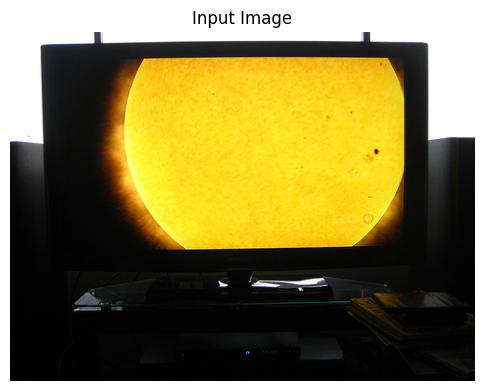

Class  Logic Model Probability
0     aeroplane                 0.106244
1       bicycle                 0.069430
2          bird                 0.088985
3          boat                 0.101659
4        bottle                 0.068342
5           bus                 0.081449
6           car                 0.092725
7           cat                 0.114659
8         chair                 0.158895
9           cow                 0.083992
10  diningtable                 0.094609
11          dog                 0.072101
12        horse                 0.073254
13    motorbike                 0.088045
14       person                 0.159449
15  pottedplant                 0.078895
16        sheep                 0.100364
17         sofa                 0.136224
18        train                 0.084539
19    tvmonitor                 0.626506
20      vehicle                 0.112789
21       animal                 0.087091
22       indoor                 0.949572

In [31]:
import matplotlib.pyplot as plt

# Show image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Input Image", fontsize=12)
plt.show()

# VOC class names
class_names = [
    'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow',
    'diningtable', 'dog', 'horse', 'motorbike', 'person',
    'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', "vehicle", "animal", "indoor"
]

import pandas as pd 

df = pd.DataFrame({
    'Class': class_names,
    # 'Raw Model Probability': r_probs.numpy(),
    'Logic Model Probability': l_probs.numpy()
})
df

In [ ]:
val_images = np.load(r"data/pascal/formatted_val_images.npy")
val_labels = np.load(r"data/pascal/formatted_val_labels.npy")
val_labels_obs = np.load(r"data/pascal/formatted_val_labels_obs.npy")
val_images[0], val_labels[0], val_labels_obs[0]

(np.str_('2008_000002.jpg'),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0.], dtype=float32))

In [ ]:
from PIL import Image

class_names = [
    'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow',
    'diningtable', 'dog', 'horse', 'motorbike', 'person',
    'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', "vehicle", "animal", "indoor"
]


val_images = np.load(r"data/pascal/formatted_val_images.npy")
val_labels = np.load(r"data/pascal/formatted_val_labels.npy")
val_labels_obs = np.load(r"data/pascal/formatted_val_labels_obs.npy")

img_path = r"data/pascal/VOCdevkit/VOC2012/JPEGImages/" + val_images[0]
img = Image.open(img_path).convert("RGB")

input_tensor = transform(img).unsqueeze(0) 
with torch.no_grad():
    l_logits = l_model(input_tensor)
    l_probs = torch.sigmoid(l_logits).squeeze(0) 

df = pd.DataFrame({
    'Class': class_names,
    'Logic Model Probability': l_probs.numpy()
})

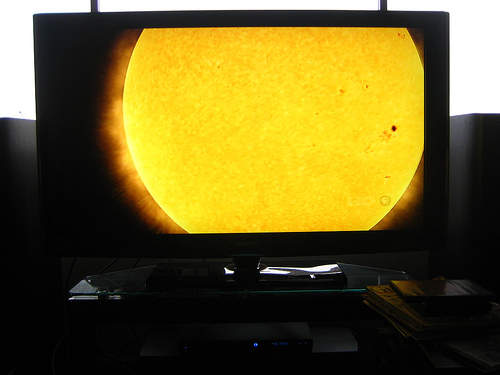

In [18]:
img

In [32]:
import os
import numpy as np
import torch
from PIL import Image
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import (
    average_precision_score, roc_auc_score,
    precision_recall_fscore_support, f1_score, precision_score, recall_score,
    accuracy_score, hamming_loss
)

# ---- Inputs you already have ----
# class_names = [...]
# val_images, val_labels, val_labels_obs = np.load(...)
# transform, l_model defined elsewhere

IMG_DIR = r"data/pascal/VOCdevkit/VOC2012/JPEGImages/"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
l_model = l_model.to(DEVICE).eval()

# ---------- 1) Get probabilities for ALL validation images ----------
def predict_all_probs(img_names, batch_size=32, threshold=None):
    """
    Returns:
        y_scores: (N, C) float array of probabilities
    """
    N = len(img_names)
    # Peek one image to get C
    first_img = Image.open(os.path.join(IMG_DIR, img_names[0])).convert("RGB")
    with torch.no_grad():
        C = l_model(transform(first_img).unsqueeze(0).to(DEVICE)).shape[-1]

    y_scores = np.zeros((N, C), dtype=np.float32)

    # Simple batching without DataLoader
    for start in tqdm(range(0, N, batch_size), desc="Predicting"):
        end = min(start + batch_size, N)
        batch_imgs = []
        for i in range(start, end):
            p = os.path.join(IMG_DIR, img_names[i])
            img = Image.open(p).convert("RGB")
            batch_imgs.append(transform(img))
        batch_tensor = torch.stack(batch_imgs, dim=0).to(DEVICE)

        with torch.no_grad():
            logits = l_model(batch_tensor)
            probs = torch.sigmoid(logits).cpu().numpy()
        y_scores[start:end] = probs

    return y_scores

# Ensure filenames are strings (sometimes np.load yields bytes)
val_files = [fn.decode() if isinstance(fn, bytes) else str(fn) for fn in val_images]
y_true = val_labels.astype(int)             # shape (N, C)
y_scores = predict_all_probs(val_files, batch_size=32)

# ---------- 2) Compute metrics ----------
def multilabel_metrics(y_true, y_scores, class_names, threshold=0.5):
    """
    Computes:
      - Per-class: AP, AUROC, Precision, Recall, F1 (at threshold)
      - Overall: mAP (macro), AP-micro, AUROC-macro, AUROC-micro,
                 Precision/Recall/F1 (micro & macro at threshold),
                 Subset Accuracy, Hamming Loss
    """
    N, C = y_true.shape
    assert C == len(class_names), "class_names length must match labels"

    # Per-class AP & AUROC (use probabilities)
    ap_per_class = []
    auroc_per_class = []
    for c in range(C):
        y_c = y_true[:, c]
        s_c = y_scores[:, c]
        # average_precision_score works even with class imbalance
        ap_c = average_precision_score(y_c, s_c) if (y_c.max() != y_c.min()) else np.nan
        # roc_auc_score requires both classes present
        try:
            auc_c = roc_auc_score(y_c, s_c)
        except ValueError:
            auc_c = np.nan
        ap_per_class.append(ap_c)
        auroc_per_class.append(auc_c)

    # Threshold to get binary predictions
    y_pred = (y_scores >= threshold).astype(int)

    # Per-class P/R/F1 at threshold
    prec_c, rec_c, f1_c, _ = precision_recall_fscore_support(
        y_true, y_pred, average=None, zero_division=0
    )

    # Overall (micro/macro)
    map_macro = np.nanmean(ap_per_class)
    ap_micro  = average_precision_score(y_true, y_scores, average="micro")
    auroc_macro = np.nanmean(auroc_per_class)
    # For AUROC micro, flatten
    try:
        auroc_micro = roc_auc_score(y_true.ravel(), y_scores.ravel())
    except ValueError:
        auroc_micro = np.nan

    p_micro = precision_score(y_true, y_pred, average="micro", zero_division=0)
    r_micro = recall_score(y_true, y_pred, average="micro", zero_division=0)
    f1_micro = f1_score(y_true, y_pred, average="micro", zero_division=0)

    p_macro = precision_score(y_true, y_pred, average="macro", zero_division=0)
    r_macro = recall_score(y_true, y_pred, average="macro", zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average="macro", zero_division=0)

    subset_acc = accuracy_score(y_true, y_pred)  # exact match ratio
    hamming = hamming_loss(y_true, y_pred)

    # Build per-class table
    per_class_df = pd.DataFrame({
        "Class": class_names,
        "AP": ap_per_class,
        "AUROC": auroc_per_class,
        "Precision@{:.2f}".format(threshold): prec_c,
        "Recall@{:.2f}".format(threshold): rec_c,
        "F1@{:.2f}".format(threshold): f1_c,
        "Support": y_true.sum(axis=0)
    })

    # Overall summary
    overall = {
        "mAP (macro mean AP)": map_macro,
        "AP (micro)": ap_micro,
        "AUROC (macro mean)": auroc_macro,
        "AUROC (micro)": auroc_micro,
        "Precision (micro)@{:.2f}".format(threshold): p_micro,
        "Recall (micro)@{:.2f}".format(threshold): r_micro,
        "F1 (micro)@{:.2f}".format(threshold): f1_micro,
        "Precision (macro)@{:.2f}".format(threshold): p_macro,
        "Recall (macro)@{:.2f}".format(threshold): r_macro,
        "F1 (macro)@{:.2f}".format(threshold): f1_macro,
        "Subset Accuracy": subset_acc,
        "Hamming Loss": hamming,
    }

    overall_df = pd.DataFrame(list(overall.items()), columns=["Metric", "Value"])
    return per_class_df, overall_df, y_pred

per_class_df, overall_df, y_pred = multilabel_metrics(y_true, y_scores, class_names, threshold=0.5)

print("\n=== Overall Metrics ===")
print(overall_df.to_string(index=False))

print("\n=== Per-class Metrics ===")
print(per_class_df.sort_values("AP", ascending=False).to_string(index=False))


Predicting: 100%|██████████| 182/182 [00:50<00:00,  3.61it/s]


=== Overall Metrics ===
                Metric    Value
   mAP (macro mean AP) 0.871152
            AP (micro) 0.918882
    AUROC (macro mean) 0.973821
         AUROC (micro) 0.978919
Precision (micro)@0.50 0.948215
   Recall (micro)@0.50 0.721080
       F1 (micro)@0.50 0.819195
Precision (macro)@0.50 0.935112
   Recall (macro)@0.50 0.641806
       F1 (macro)@0.50 0.746957
       Subset Accuracy 0.540615
          Hamming Loss 0.032831

=== Per-class Metrics ===
      Class       AP    AUROC  Precision@0.50  Recall@0.50  F1@0.50  Support
     animal 0.987647 0.989669        0.995984     0.829035 0.904874     2094
  aeroplane 0.983365 0.998149        0.996466     0.822157 0.900958      343
    vehicle 0.974182 0.983785        0.928098     0.920587 0.924327     1977
        cat 0.963270 0.990539        0.988938     0.826248 0.900302      541
      train 0.962765 0.995004        0.990868     0.800738 0.885714      271
     person 0.959075 0.968963        0.946631     0.838987 0.889564   

Predicting: 100%|██████████| 182/182 [00:53<00:00,  3.39it/s]
=== Overall Metrics ===
                Metric    Value
   mAP (macro mean AP) 0.871850
            AP (micro) 0.918579
    AUROC (macro mean) 0.974405
         AUROC (micro) 0.975456
Precision (micro)@0.50 0.945436
   Recall (micro)@0.50 0.732518
       F1 (micro)@0.50 0.825468
Precision (macro)@0.50 0.931927
   Recall (macro)@0.50 0.642715
       F1 (macro)@0.50 0.747715
       Subset Accuracy 0.559677
          Hamming Loss 0.031950

=== Per-class Metrics ===
      Class       AP    AUROC  Precision@0.50  Recall@0.50  F1@0.50  Support
  aeroplane 0.989295 0.998306        0.996721     0.886297 0.938272      343
     animal 0.988992 0.992459        0.951636     0.958453 0.955032     2094
        cat 0.978373 0.994557        0.978495     0.841035 0.904573      541
    vehicle 0.968770 0.979942        0.940863     0.893273 0.916450     1977
     person 0.962318 0.971246        0.964833     0.812709 0.882261     2093
      train 0.958987 0.995938        0.985075     0.730627 0.838983      271
       bird 0.950206 0.982256        0.996491     0.767568 0.867176      370
        dog 0.940481 0.988217        0.937729     0.782875 0.853333      654
        bus 0.926358 0.990632        0.981366     0.759615 0.856369      208
      horse 0.926312 0.990960        0.966102     0.697959 0.810427      245
      sheep 0.910793 0.986524        0.939655     0.707792 0.807407      154
  motorbike 0.904755 0.981971        0.959538     0.636015 0.764977      261
       boat 0.893447 0.980566        0.963190     0.633065 0.763990      248
    bicycle 0.883707 0.970756        0.943820     0.591549 0.727273      284
        cow 0.880593 0.993611        0.907407     0.644737 0.753846      152
  tvmonitor 0.866540 0.962061        0.972603     0.498246 0.658933      285
     indoor 0.859649 0.929960        0.916188     0.573276 0.705259     1392
        car 0.837805 0.956472        0.901515     0.625219 0.738366      571
      chair 0.755326 0.945522        0.943503     0.301989 0.457534      553
       sofa 0.701023 0.962034        0.807692     0.420000 0.552632      250
     bottle 0.680471 0.940307        0.889706     0.354839 0.507338      341
diningtable 0.659802 0.966599        0.788462     0.304833 0.439678      269
pottedplant 0.628538 0.950423        0.801724     0.360465 0.497326      258

In [33]:
## Coco dataset
import json 

with open(r"data/coco/annotations/formatted_metadata.json", 'r') as f:
    coco_meta = json.load(f)

In [35]:
coco_meta.keys()

dict_keys(['category_id_to_index', 'category_list'])

In [42]:
coco_img = np.load(r"data/coco/formatted_train_images.npy")
coco_labels = np.load(r"data/coco/formatted_train_labels.npy")
coco_labels_obs = np.load(r"data/coco/formatted_train_labels_obs.npy")


Active categories: ['giraffe']


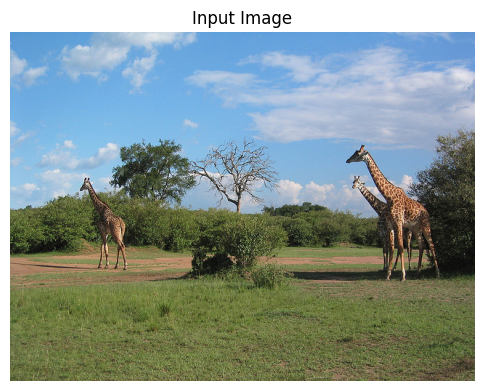

Active categories: ['person', 'sports ball']


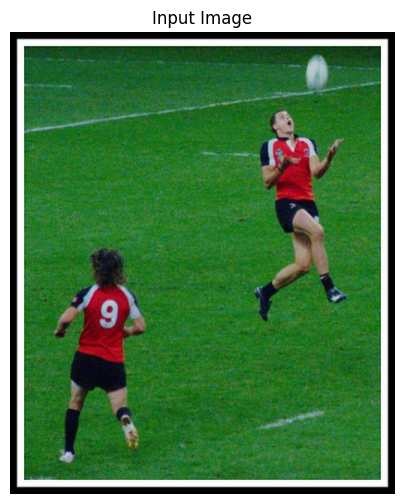

Active categories: ['person', 'airplane', 'handbag']


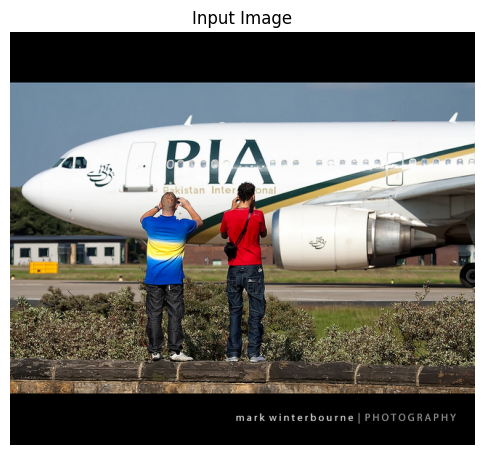

Active categories: ['pizza']


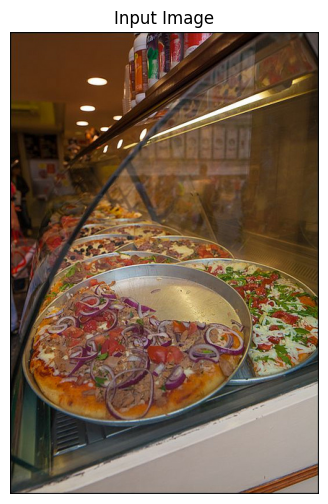

Active categories: ['stop sign']


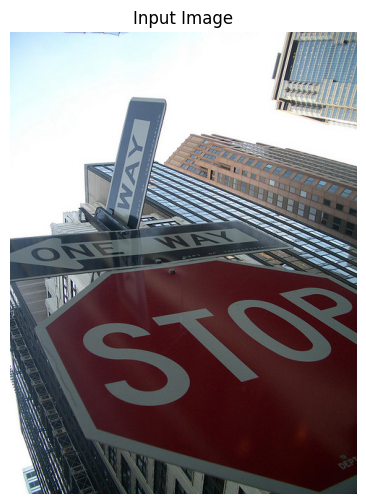

Active categories: ['person', 'car', 'skateboard']


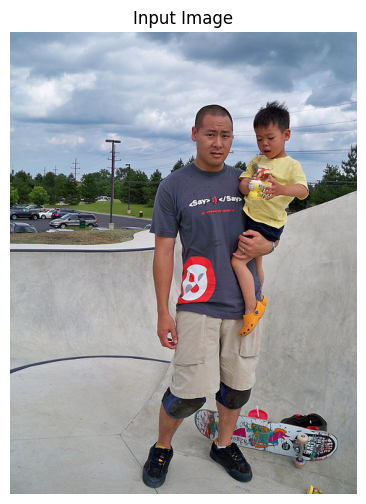

Active categories: ['person', 'skis']


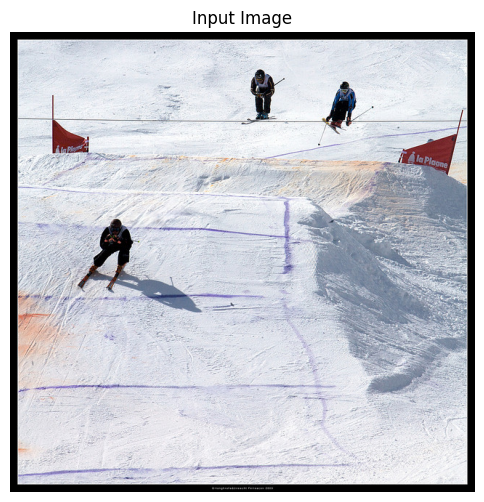

Active categories: ['person', 'spoon', 'bowl', 'dining table', 'book']


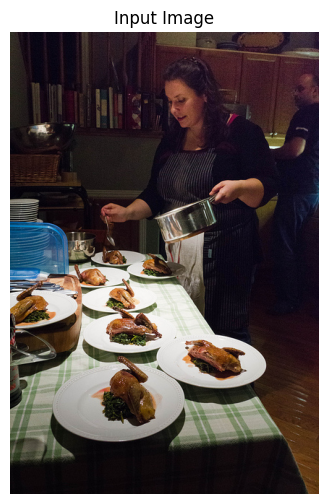

Active categories: ['person', 'cow', 'tie']


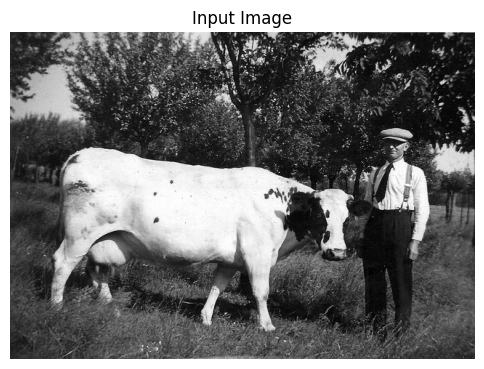

In [56]:
for x in range(11, 20):
    img_path = r"data/coco/" + coco_img[x]
    img = Image.open(img_path).convert("RGB")
    categories = coco_meta["category_list"]
    labels = coco_labels[x]

    active_cats = [cat for cat, val in zip(categories, labels) if val == 1]

    print("Active categories:", active_cats)
    import matplotlib.pyplot as plt
    # Show image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Image", fontsize=12)
    plt.show()


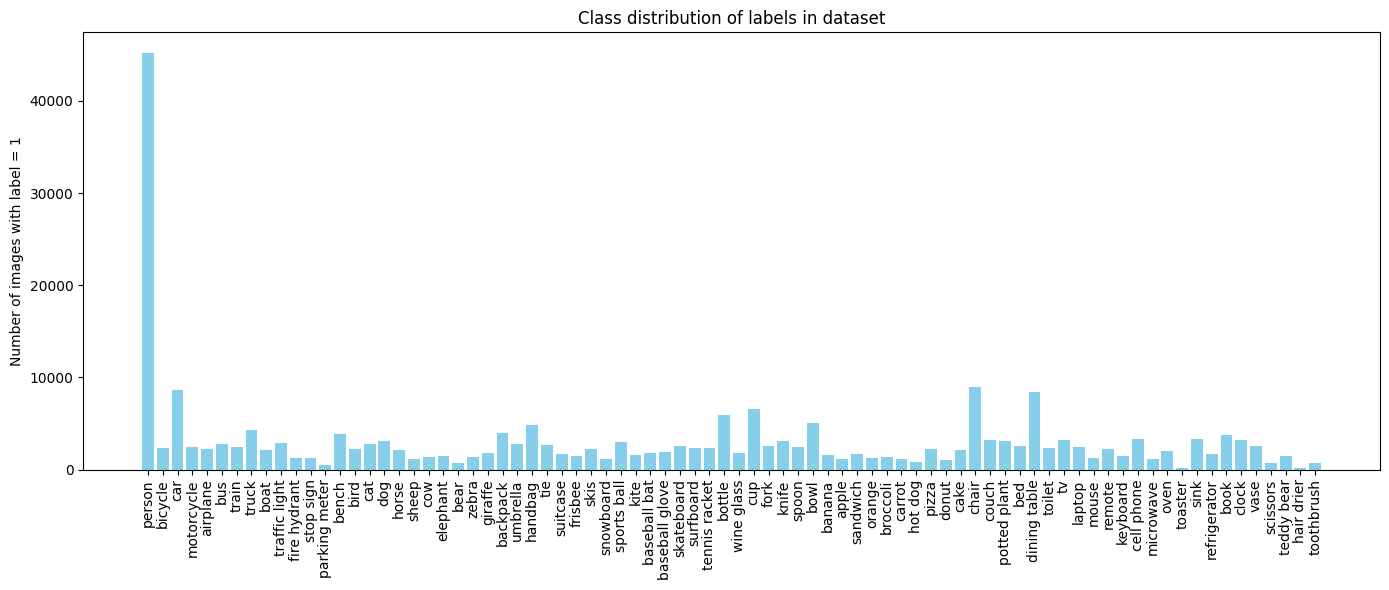

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# category list and labels
categories = coco_meta["category_list"]       # list of class names
labels = coco_labels                          # shape: (N, C), values 0/1

# count number of positives per class
class_counts = labels.sum(axis=0)             # shape: (C,)

# plot histogram
plt.figure(figsize=(14,6))
plt.bar(range(len(categories)), class_counts, color="skyblue")
plt.xticks(range(len(categories)), categories, rotation=90)
plt.ylabel("Number of images with label = 1")
plt.title("Class distribution of labels in dataset")
plt.tight_layout()
plt.show()



In [58]:
class_counts

array([45174.,  2287.,  8606.,  2442.,  2243.,  2791.,  2464.,  4321.,
        2098.,  2893.,  1205.,  1214.,   481.,  3844.,  2241.,  2818.,
        3041.,  2068.,  1105.,  1389.,  1518.,   668.,  1324.,  1798.,
        3924.,  2749.,  4861.,  2667.,  1631.,  1511.,  2209.,  1170.,
        2986.,  1625.,  1804.,  1884.,  2511.,  2343.,  2368.,  5968.,
        1771.,  6518.,  2537.,  3097.,  2493.,  5028.,  1618.,  1171.,
        1645.,  1216.,  1340.,  1186.,   821.,  2202.,  1062.,  2080.,
        8950.,  3170.,  3084.,  2539.,  8378.,  2317.,  3191.,  2475.,
        1290.,  2180.,  1471.,  3322.,  1089.,  2003.,   151.,  3291.,
        1671.,  3734.,  3159.,  2530.,   673.,  1510.,   128.,   700.])

In [59]:
dist = pd.DataFrame({
    'Class': categories,    
    'Count': class_counts
})

In [63]:
dist.Count.describe()

count       80.000000
mean      3012.937500
std       5065.558098
min        128.000000
25%       1450.500000
50%       2225.000000
75%       2999.750000
max      45174.000000
Name: Count, dtype: float64

In [64]:
dist.tail(40)

Class   Count
40    wine glass  1771.0
41           cup  6518.0
42          fork  2537.0
43         knife  3097.0
44         spoon  2493.0
45          bowl  5028.0
46        banana  1618.0
47         apple  1171.0
48      sandwich  1645.0
49        orange  1216.0
50      broccoli  1340.0
51        carrot  1186.0
52       hot dog   821.0
53         pizza  2202.0
54         donut  1062.0
55          cake  2080.0
56         chair  8950.0
57         couch  3170.0
58  potted plant  3084.0
59           bed  2539.0
60  dining table  8378.0
61        toilet  2317.0
62            tv  3191.0
63        laptop  2475.0
64         mouse  1290.0
65        remote  2180.0
66      keyboard  1471.0
67    cell phone  3322.0
68     microwave  1089.0
69          oven  2003.0
70       toaster   151.0
71          sink  3291.0
72  refrigerator  1671.0
73          book  3734.0
74         clock  3159.0
75          vase  2530.0
76      scissors   673.0
77    teddy bear  1510.0
78    hair drier   128.0
79    toothbrush   700.0

In [65]:
dist.head(40)

Class    Count
0           person  45174.0
1          bicycle   2287.0
2              car   8606.0
3       motorcycle   2442.0
4         airplane   2243.0
5              bus   2791.0
6            train   2464.0
7            truck   4321.0
8             boat   2098.0
9    traffic light   2893.0
10    fire hydrant   1205.0
11       stop sign   1214.0
12   parking meter    481.0
13           bench   3844.0
14            bird   2241.0
15             cat   2818.0
16             dog   3041.0
17           horse   2068.0
18           sheep   1105.0
19             cow   1389.0
20        elephant   1518.0
21            bear    668.0
22           zebra   1324.0
23         giraffe   1798.0
24        backpack   3924.0
25        umbrella   2749.0
26         handbag   4861.0
27             tie   2667.0
28        suitcase   1631.0
29         frisbee   1511.0
30            skis   2209.0
31       snowboard   1170.0
32     sports ball   2986.0
33            kite   1625.0
34    baseball bat   1804.0
35  baseball glove   1884.0
36      skateboard   2511.0
37       surfboard   2343.0
38   tennis racket   2368.0
39          bottle   5968.0

In [7]:
import json
with open(r"data/coco/annotations/instances_val2014.json", 'r') as f:
    text = json.load(f)

In [8]:
text.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

In [9]:
text["info"]

{'description': 'COCO 2014 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2014,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [11]:
text["categories"]

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [13]:
import numpy as np

In [14]:
ttt = np.load(r"data/coco/formatted_train_labels.npy")

In [15]:
ttt.shape

(82081, 92)

In [16]:
ttt[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0.])

In [47]:
import numpy as np
import json

# load data
labels = np.load(r"data/coco/formatted_train_labels.npy", allow_pickle=True)
images = np.load(r"data/coco/formatted_train_images.npy", allow_pickle=True)

with open("data/coco/annotations/formatted_metadata.json", "r") as f:
    meta = json.load(f)


In [48]:
x = 4

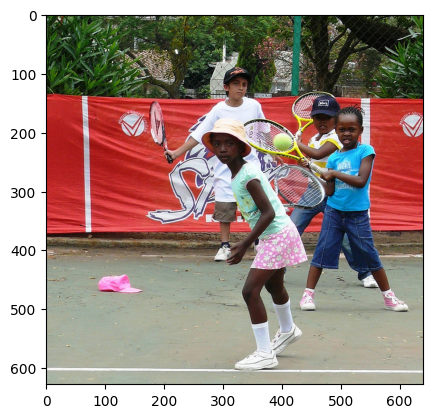

In [49]:
from PIL import Image
import matplotlib.pyplot as plt

row = labels[x]
with open(r"data/coco/" + images[x], "rb") as f:
    img = Image.open(f).convert("RGB")  

plt.imshow(img)

In [50]:
# split counts
num_categories = len(meta["category_list"])
num_supercats = len(meta["unique_supercategories"])

# find indices where label = 1
active_indices = np.where(row == 1)[0]

# map them
active_classes = []
for idx in active_indices:
    if idx < num_categories:
        active_classes.append(meta["category_list"][idx])
    else:
        super_idx = idx - num_categories
        active_classes.append(meta["unique_supercategories"][super_idx])

print(f"Labels for image {x}:", active_classes)


Labels for image 4: ['person', 'sports ball', 'tennis racket', 'sports']


In [51]:
labels.shape

(82081, 91)

In [53]:
labels = np.load(r"data/coco/formatted_train_labels_obs.npy")

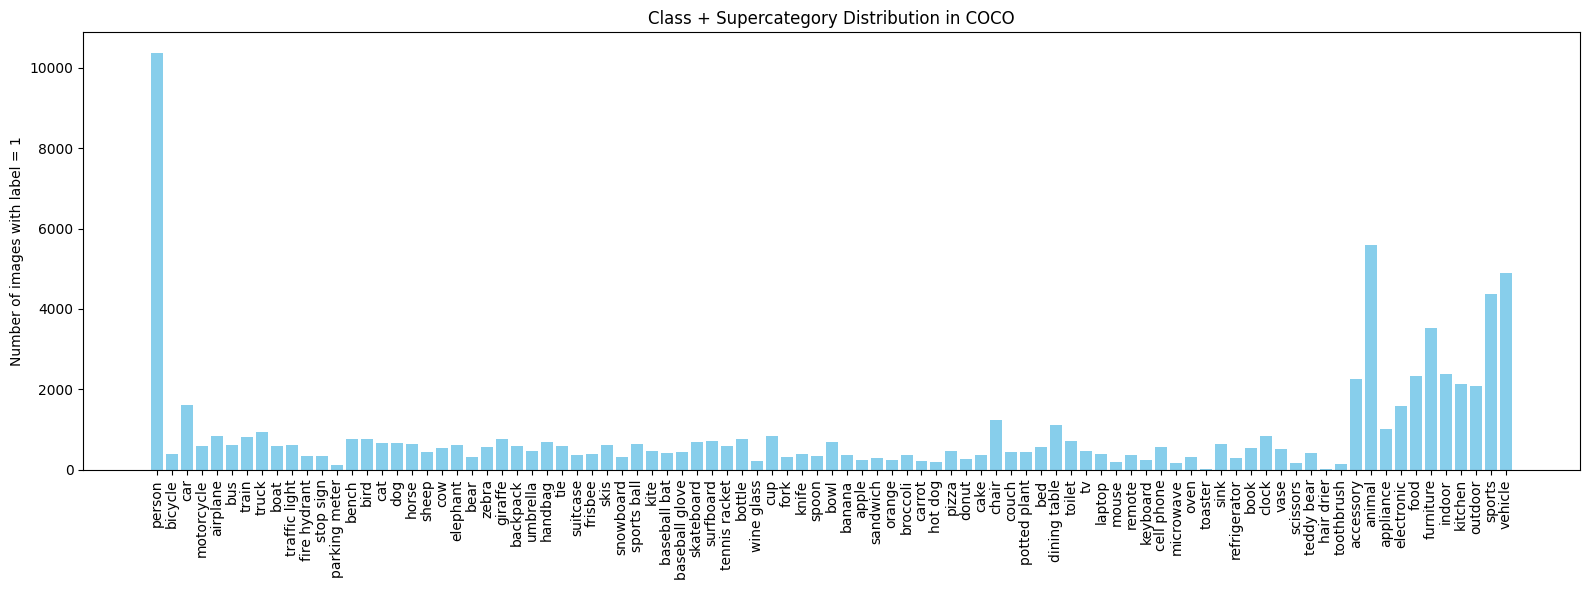

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import json

# load metadata
with open("data/coco/annotations/formatted_metadata.json") as f:
    coco_meta = json.load(f)

num_classes = len(coco_meta["category_list"])              # 80 fine classes
num_supercats = len(coco_meta["unique_supercategories"])   # 11 supercategories

# make full category list (fine classes + supercategories)
all_categories = coco_meta["category_list"] + coco_meta["unique_supercategories"]

# sanity check
assert labels.shape[1] == num_classes + num_supercats

# count number of positives per class/supercat
class_counts = labels.sum(axis=0)

# plot histogram
plt.figure(figsize=(16,6))
plt.bar(range(len(all_categories)), class_counts, color="skyblue")
plt.xticks(range(len(all_categories)), all_categories, rotation=90)
plt.ylabel("Number of images with label = 1")
plt.title("Class + Supercategory Distribution in COCO")
plt.tight_layout()
plt.show()


In [56]:
import pandas as pd

In [57]:
df = pd.DataFrame({
    'Class': all_categories,    
    'Count': class_counts
})

In [60]:
df.tail(40)

Class   Count
51        carrot   223.0
52       hot dog   188.0
53         pizza   454.0
54         donut   263.0
55          cake   357.0
56         chair  1227.0
57         couch   436.0
58  potted plant   431.0
59           bed   569.0
60  dining table  1120.0
61        toilet   709.0
62            tv   451.0
63        laptop   377.0
64         mouse   184.0
65        remote   357.0
66      keyboard   238.0
67    cell phone   569.0
68     microwave   164.0
69          oven   301.0
70       toaster    10.0
71          sink   640.0
72  refrigerator   278.0
73          book   530.0
74         clock   836.0
75          vase   512.0
76      scissors   171.0
77    teddy bear   418.0
78    hair drier    22.0
79    toothbrush   146.0
80     accessory  2263.0
81        animal  5600.0
82     appliance  1021.0
83    electronic  1592.0
84          food  2322.0
85     furniture  3527.0
86        indoor  2382.0
87       kitchen  2139.0
88       outdoor  2083.0
89        sports  4363.0
90       vehicle  4899.0

In [61]:
supercats = coco_meta["unique_supercategories"]
supercat_to_id = {sc: i+20 for i, sc in enumerate(supercats)}  # start from 20 like your example


In [62]:
cat_list = coco_meta["category_list"]               # 80 fine class names
supercat_list = coco_meta["supercategory_list"]     # 80 aligned supercategories

cat_to_id = {name: idx for idx, name in enumerate(cat_list)}   # category name → index

In [63]:
output_lines = []
for cat_idx, supercat in enumerate(supercat_list):
    if supercat in supercat_to_id:   # skip "person" if excluded
        super_id = supercat_to_id[supercat]
        line = f"{super_id} :- {cat_idx}"
        output_lines.append(line)

with open("coco_super_to_cat.txt", "w") as f:
    f.write("\n".join(output_lines))